In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from rk4 import rk_error_control_perfect_first_step, rk_error_control_static_alpha_beta

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    (res, sol, first_deriv, error_samplings, ratios) = rk_error_control_perfect_first_step(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, error_samplings) = rk_error_control_static_alpha_beta(model, t_span, y0[0], tol, solution)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    # for this_x in xs:
    #     plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    plt.plot(t_eval, computed_solutions, label="computed solution")

    actual_solutions = solution(t_eval)
    plt.plot(t_eval, actual_solutions, label="actual solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    plt.title(f"actual solution vs interpolated solution tol={tol}")
    plt.xlabel("t")
    plt.ylabel('y')
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    for this_x in xs:
        plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="global error")
    plt.title(f"global error for tol={tol}")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    plt.figure()
    end_of_steps = [r[0] for r in ratios]
    ratios_at_end_of_steps = [r[1] for r in ratios]
    plt.plot(end_of_steps, ratios_at_end_of_steps)
    plt.axhline(y=1)
    plt.title(f"error_estimate/exact_error at end of steps for tol={tol}")
    plt.show()

    # # shape of errors - graphs
    # plt.figure()
    # for (x_i, x_i_plus_1, hb) in error_samplings:
    #     num_points = 100
    #     pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
    #     errors = []
    #     for i, pt in enumerate(pts_to_sample):
    #         y = solution([pt])[0]
    #         hb_eval = hb.eval(pt)
    #         error = abs(hb_eval - y)
    #         errors.append( error )

    #         # # print the error at the extremities
    #         # if i == 0:
    #         #     interpolation_error = hb_eval - hb.y_i
    #         #     print("error=", error, "interpolation_error=", interpolation_error)

    #         # if i == len(pts_to_sample) - 1:
    #         #     interpolation_error = hb_eval - hb.y_i_plus_1
    #         #     print("error=", error, "interpolation_error=", interpolation_error)

    #     maximum_error = max(errors)
    #     scaled_errors = [error / (maximum_error) for error in errors]

    #     # str_x_i = "{:.3f}".format(x_i)
    #     # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
    #     x_axis = [i/(num_points - 1) for i in range(num_points)]
    #     plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    # plt.title("plot of shape of errors")
    # plt.xlabel("step scaled between 0 and 1")
    # plt.ylabel('scaled error')
    # # plt.legend()
    # plt.show()

    # # ====================================== figure of satisfying global defect
    # actual_f_evals = [model(x, solution([x])[0])[0] for x in t_eval]
    # hb_prime_evals = [first_deriv(x) for x in t_eval]
    # plt.figure()
    # plt.plot(t_eval, actual_f_evals)
    # plt.plot(t_eval, hb_prime_evals)
    # plt.title(f"first derivative for tol={tol}")
    # plt.show()

    # defects = [abs(actual_f_eval - hb_prime_eval) for (actual_f_eval, hb_prime_eval) in zip(actual_f_evals, hb_prime_evals)]
    # plt.figure()
    # plt.plot(t_eval, defects)
    # plt.title(f"global defect for tol={tol}")
    # plt.show()
    
    # # ====================================== end figure of satisfying global defect

    # # ====================================== figure of defect shape

    # minimum_step_size = 0.01
    # defects_small_steps = []
    # plt.figure()
    # for (x_i_minus_1, x_i, x_i_plus_1, hb) in derivs:
    #     num_points = 100
    #     pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
    #     defects = []
    #     for pt in pts_to_sample:
    #         y = solution([pt])[0]
    #         f_eval  = model(pt, y)[0]
    #         hb_prime_eval = hb.prime(pt)
    #         defects.append( abs(hb_prime_eval - f_eval) )
    #     maximum_defect = max(defects)
    #     # minimum_defect = min(defects)
    #     # plot_vals = [(defect - minimum_defect) / (maximum_defect - minimum_defect) for defect in defects]
    #     plot_vals = [ defect/ maximum_defect for defect in defects]
    #     #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    #     x_axis = [i/(num_points - 1) for i in range(num_points)]

    #     if (x_i_plus_1 - x_i < minimum_step_size):
    #         defects_small_steps.append([x_axis, plot_vals])
    #         continue
    #     plt.plot(x_axis, plot_vals, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    # plt.title("plot of defects")
    # plt.xlabel("x_i to x_i_plus_1")
    # plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # # plt.legend()
    # plt.show()
    # # ====================================== end figure of defect

    # # ====================================== defects on small steps
    # plt.figure()
    # for [x_axis, plot_vals] in defects_small_steps:
    #     plt.plot(x_axis, plot_vals)
    # plt.title("plot of defects on small step sizes")
    # plt.xlabel("x_i to x_i_plus_1")
    # plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # plt.show()

RATIO: 0.6388563842329537 should be close to 1
RATIO: 0.5829006435473756 should be close to 1
RATIO: 2.7149361286210167 should be close to 1
RATIO: 4.69674597204086 should be close to 1
RATIO: 1.8477142958723274 should be close to 1
RATIO: 4.389723443610419 should be close to 1
RATIO: 1.6494323167316927 should be close to 1
RATIO: 1.1577970915458715 should be close to 1
RATIO: 0.37708850357749574 should be close to 1
RATIO: 0.19406727460499973 should be close to 1
RATIO: 1.1060953498796013 should be close to 1
RATIO: 0.8350340460424339 should be close to 1
RATIO: 0.2820482226346989 should be close to 1
RATIO: 0.14333130611545086 should be close to 1
RATIO: 0.9879767574154396 should be close to 1
RATIO: 0.7721816413999383 should be close to 1
tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 0.4999999999999999, 0.5000000000000001]
beta values [1.0, 2.0, 2.0000000000000004, 1.9999999999999996]
n_steps 16
n_successful_steps 15


Monitor6
alpha values [0.5, 1.0, 0.4999999999999999, 0.50000

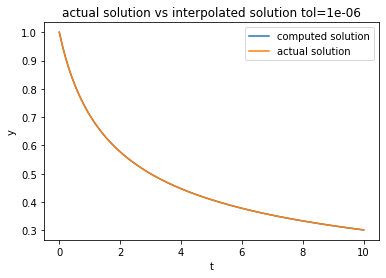

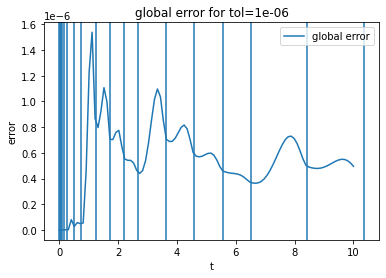

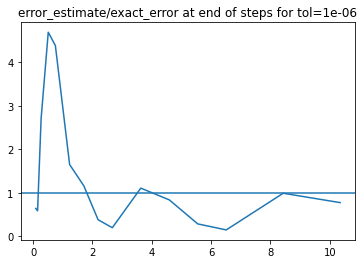

In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

RATIO: 0.29835174184898866 should be close to 1
RATIO: 0.01634219499454789 should be close to 1
RATIO: 0.1899843297124821 should be close to 1
RATIO: 0.6572301879419171 should be close to 1
RATIO: 0.3457659055464349 should be close to 1
RATIO: 1.5017244632585625 should be close to 1
RATIO: 0.23748480165441613 should be close to 1
RATIO: 0.9173528020086814 should be close to 1
RATIO: 0.15237535180630532 should be close to 1
RATIO: 0.06024434050435335 should be close to 1
RATIO: 0.3930262690998384 should be close to 1
RATIO: 0.03098333574580889 should be close to 1
RATIO: 0.011149837312274528 should be close to 1
RATIO: 0.23234095696149884 should be close to 1
RATIO: 0.016030985134084522 should be close to 1
RATIO: 0.23149720315233024 should be close to 1
RATIO: 0.015904972017950332 should be close to 1
RATIO: 0.22179013949639212 should be close to 1
RATIO: 0.2756225278957988 should be close to 1
RATIO: 0.018291376067478396 should be close to 1
RATIO: 0.07873465134449627 should be close 

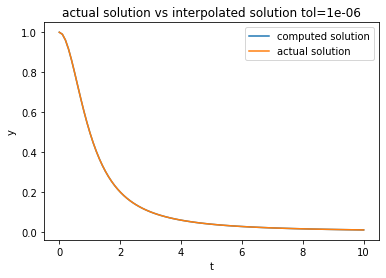

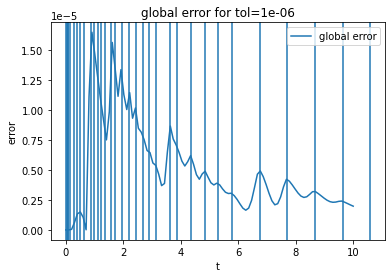

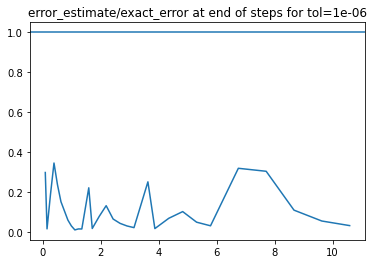

In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

RATIO: 0.09644985403208824 should be close to 1
RATIO: 0.2582324850185961 should be close to 1
RATIO: 0.38587678385274604 should be close to 1
RATIO: 0.3824000127117471 should be close to 1
RATIO: 0.3760066799906767 should be close to 1
RATIO: 0.36496402911314085 should be close to 1
RATIO: 0.1846152577431543 should be close to 1
RATIO: 0.06897982933613475 should be close to 1
RATIO: 0.04595796436680851 should be close to 1
RATIO: 0.03340531607247398 should be close to 1
RATIO: 0.025491300206737098 should be close to 1
RATIO: 0.02000231001610405 should be close to 1
RATIO: 0.01586292028377082 should be close to 1
RATIO: 0.012456373993703342 should be close to 1
RATIO: 0.009436265033105807 should be close to 1
tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 0.4999999999999999, 0.5000000000000001, 0.9999999999999998, 1.0000000000000002, 1.0000000000000009]
beta values [0.9999999999999998, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 1.0000000000000002, 0.9999999999999991, 1.000000

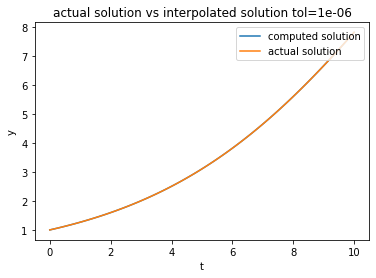

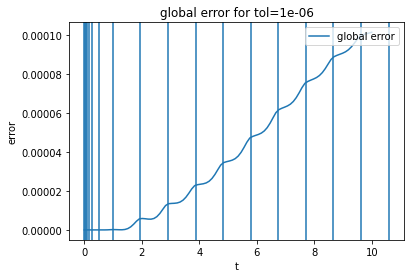

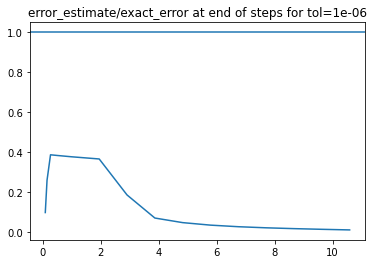

In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

RATIO: 1.3365321666887722 should be close to 1
RATIO: 1.1134800763697472 should be close to 1
RATIO: 0.0734474849938526 should be close to 1
RATIO: 0.3603977125378806 should be close to 1
RATIO: 0.4519424684291402 should be close to 1
RATIO: 0.11636467617846163 should be close to 1
RATIO: 0.42330925210611303 should be close to 1
RATIO: 0.17738775714163715 should be close to 1
RATIO: 0.5152525658877809 should be close to 1
RATIO: 0.4065961672153637 should be close to 1
RATIO: 0.47509003401697364 should be close to 1
RATIO: 0.45746653956672195 should be close to 1
RATIO: 0.46853109413842636 should be close to 1
RATIO: 0.4741493291951055 should be close to 1
RATIO: 0.46970753794884745 should be close to 1
RATIO: 0.47977197406097155 should be close to 1
RATIO: 0.4723805194791211 should be close to 1
RATIO: 0.482285233002618 should be close to 1
RATIO: 0.4750962972711675 should be close to 1
RATIO: 0.4838471981973252 should be close to 1
RATIO: 0.47755715696912643 should be close to 1
RATIO

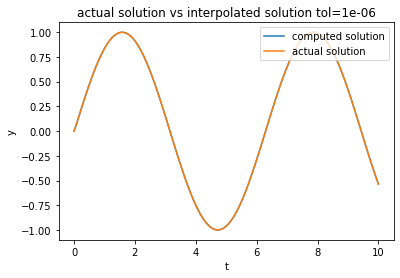

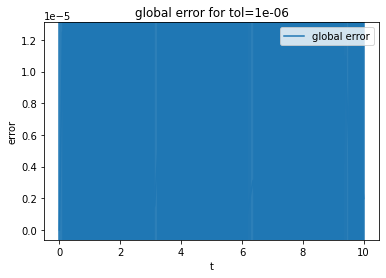

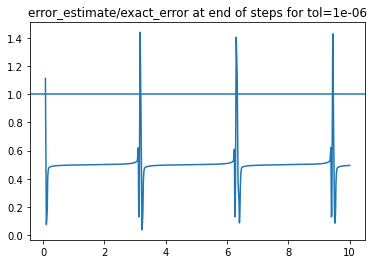

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

RATIO: 0.03816349775934774 should be close to 1
RATIO: 0.34523367700056046 should be close to 1
RATIO: 0.27914954510958745 should be close to 1
RATIO: 0.26162116935574686 should be close to 1
RATIO: 0.22452989551115368 should be close to 1
RATIO: 0.01838469760774027 should be close to 1
RATIO: 0.16990242445922193 should be close to 1
RATIO: 0.23014776158662004 should be close to 1
RATIO: 0.01625867421280647 should be close to 1
RATIO: 0.005853932741654913 should be close to 1
RATIO: 0.32976461219474484 should be close to 1
RATIO: 0.03594870917613333 should be close to 1
RATIO: 0.025214874201987137 should be close to 1
RATIO: 0.10795501825366606 should be close to 1
RATIO: 0.005200848271127679 should be close to 1
RATIO: 0.02401081660785765 should be close to 1
RATIO: 0.11727166972619155 should be close to 1
RATIO: 0.007480571483326595 should be close to 1
RATIO: 0.020505522719326572 should be close to 1
RATIO: 0.006552738718967793 should be close to 1
RATIO: 0.06900098001087805 should 

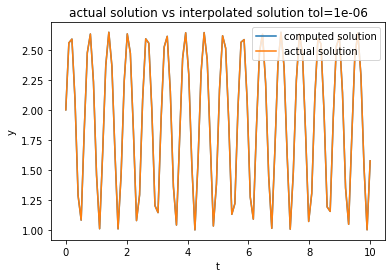

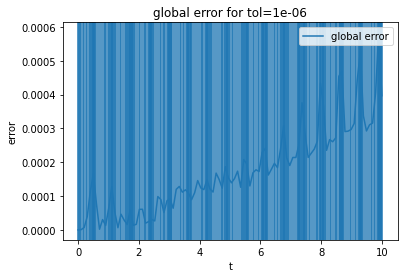

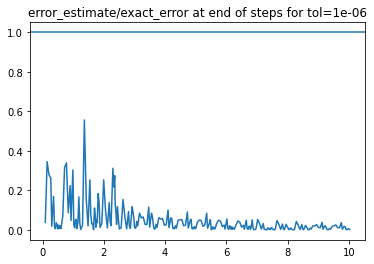

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

RATIO: 167.36345554661295 should be close to 1
RATIO: 113.94519144029579 should be close to 1
RATIO: 41.59866779175743 should be close to 1
RATIO: 10.311253195761518 should be close to 1
RATIO: 4.378644757576505 should be close to 1
RATIO: 3.262069999321089 should be close to 1
RATIO: 2.9055517184457402 should be close to 1
RATIO: 5.019641613659765 should be close to 1
RATIO: 4.233676154822193 should be close to 1
RATIO: 3.0355324319802155 should be close to 1
RATIO: 2.2906822092359307 should be close to 1
RATIO: 3.8524594434773625 should be close to 1
RATIO: 3.3591693736621715 should be close to 1
RATIO: 2.437534452467836 should be close to 1
RATIO: 1.852818490227939 should be close to 1
RATIO: 3.316578217302063 should be close to 1
RATIO: 2.953010786704822 should be close to 1
RATIO: 2.157058998474657 should be close to 1
tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 0.4999999999999999, 0.5000000000000001, 0.5000000000000002, 0.9999999999999996, 0.4999999999999998]
beta values [0

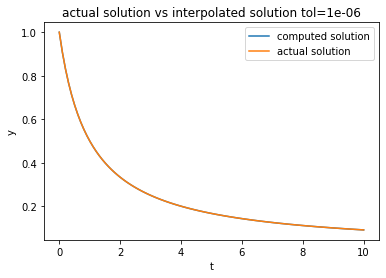

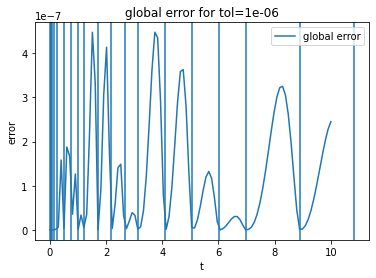

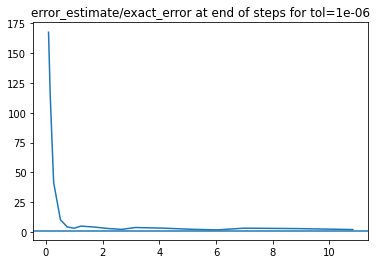

In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

RATIO: 0.08951328580133977 should be close to 1
RATIO: 0.09858929400132269 should be close to 1
RATIO: 0.15082491599576633 should be close to 1
RATIO: 0.14591248381609195 should be close to 1
RATIO: 0.188490913698698 should be close to 1
RATIO: 0.22944577201931804 should be close to 1
RATIO: 0.15945949835543918 should be close to 1
RATIO: 0.0100824128332104 should be close to 1
RATIO: 0.08661121075324002 should be close to 1
RATIO: 0.16421715145376517 should be close to 1
RATIO: 0.0099233416607625 should be close to 1
RATIO: 0.05781242243840555 should be close to 1
RATIO: 0.09418484837293578 should be close to 1
RATIO: 0.037349825148148955 should be close to 1
RATIO: 0.030756636823516426 should be close to 1
RATIO: 0.1567744862636867 should be close to 1
RATIO: 0.4905776757197665 should be close to 1
RATIO: 0.025449491166107254 should be close to 1
RATIO: 0.3081607943449886 should be close to 1
RATIO: 1.8971969293580235 should be close to 1
RATIO: 0.5450477206243001 should be close to 

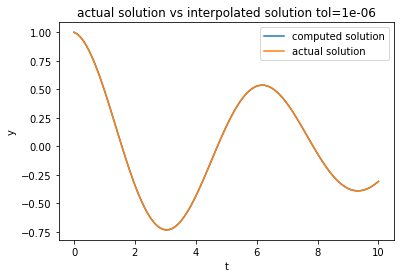

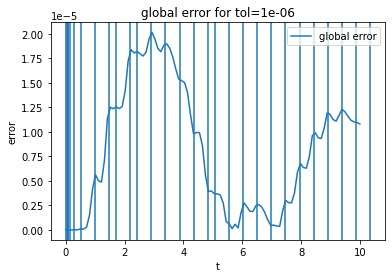

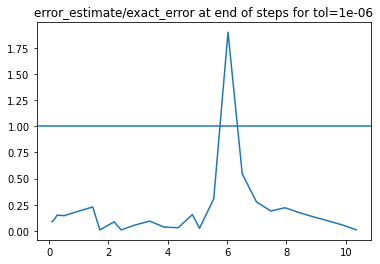

In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

RATIO: 0.09534342408091961 should be close to 1
RATIO: 0.2698172976458019 should be close to 1
RATIO: 0.4348285811854843 should be close to 1
RATIO: 0.3023682331006991 should be close to 1
RATIO: 0.11952425632050832 should be close to 1
RATIO: 0.08178819241277287 should be close to 1
RATIO: 0.06204987338948881 should be close to 1
RATIO: 0.049947059123807105 should be close to 1
RATIO: 0.0417790301767108 should be close to 1
RATIO: 0.31760597432108895 should be close to 1
RATIO: 0.03590057418310225 should be close to 1
RATIO: 0.3044310746896045 should be close to 1
RATIO: 0.03147003788991072 should be close to 1
RATIO: 0.29180955362704053 should be close to 1
RATIO: 0.028012498757802026 should be close to 1
RATIO: 0.27981133791323537 should be close to 1
RATIO: 0.3282771196887316 should be close to 1
RATIO: 0.02205115435819903 should be close to 1
RATIO: 0.09691572816199912 should be close to 1
RATIO: 0.17945665124699733 should be close to 1
RATIO: 0.09831472312338195 should be close t

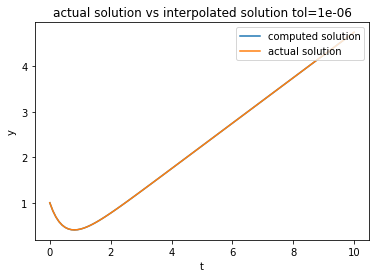

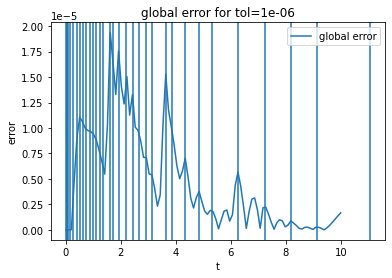

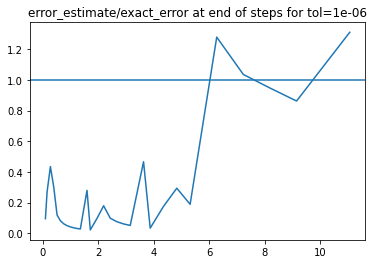

In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



TypeError: 'int' object is not subscriptable

In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)